
### EXP1-Emotion SPM maps

#### *Preprocessing:*
- Niak preprocessed EMOTION task (new scrub method)

#### *run  SPM-Maps separetly for each trial:*

```
   Fear
   Neutral
  
```

In [1]:
from nilearn import plotting
import os,glob
import numpy as np
import matplotlib.cm as cmx
import nibabel as nib
import scipy.io as sio

In [2]:
%matplotlib inline

In [17]:
# Set path
path_root = '/media/yassine/data_disk/Drive/HCP2/subtypes_scores/26-10-2016';
path_rmaps = os.path.join(path_root,"hcp_emotion_activation_maps_17-Jun-2017/group_maps/")
path_spm = os.path.join(path_root,'hcp_emotion_activation_maps_17-Jun-2017')
rmaps_file_pattern = "{}.nii.gz"

In [18]:
[f for f in os.listdir(path_rmaps)]

['neut.nii.gz', 'fear.nii.gz', 'fear_vs_neut.nii.gz']

In [19]:
# get networks names
trial_names = [f[:-7] for f in os.listdir(path_rmaps)]
trial_names

['neut', 'fear', 'fear_vs_neut']

In [21]:
task_name = path_spm.split('/')[-1].split('_')[1]
task_name

'emotion'

## 3D Group maps for connectome viewer

In [23]:
# Copy spec template
command = ' '.join(['scp', os.path.join(path_root,'templates/template_spec.spec'),
                    os.path.join(path_spm,'{}_spec.spec'.format(task_name))])
os.system(command)

# Convert vol to surf and populate spec file 
for idx,trial_name in enumerate(trial_names):
    # subtype volume
    file_in =os.path.join(path_rmaps,rmaps_file_pattern.format(trial_name))
    # convert to mesh
    list_templates =['lh','rh','cerebellum']
    for template in list_templates:
        template_file = os.path.join(path_root,'templates/{}.surf.gii'.format(template))
        file_out =  os.path.join(path_spm,'group_spm_{}_{}.surf.gii'.format(template,trial_name))
        command = ' '.join(['wb_command -volume-to-surface-mapping',
                            file_in , template_file , file_out ,'-enclosing'])
        os.system(command)
        # Fill spec file
        with open(os.path.join(path_spm,'{}_spec.spec'.format(task_name)),"a") as f:
            if template == 'cerebellum':
                print('   <DataFile Structure="Cerebellum"\n\
         DataFileType="METRIC"\n\
         Selected="true">\n\
 {}\n\
</DataFile>'.format(file_out), file=f)
            elif template == 'rh':
                print('   <DataFile Structure="CortexRight"\n\
         DataFileType="METRIC"\n\
         Selected="true">\n\
 {}\n\
</DataFile>'.format(file_out), file=f)
            elif template == 'lh':
                print('   <DataFile Structure="CortexLeft"\n\
         DataFileType="METRIC"\n\
         Selected="true">\n\
 {}\n\
</DataFile>'.format(file_out), file=f)
        
with open(os.path.join(path_spm,'{}_spec.spec'.format(task_name)),"a") as f:
    print('</CaretSpecFile>',file=f)

## 2D Group maps

(53, 64, 52) is the shape of for trial:  neut
Min = -35.760; Max = 41.924
(53, 64, 52) is the shape of for trial:  fear
Min = -24.149; Max = 48.815
(53, 64, 52) is the shape of for trial:  fear_vs_neut
Min = -23.267; Max = 46.908
SPM map from HCP Paper


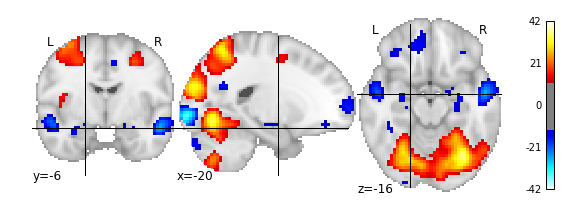

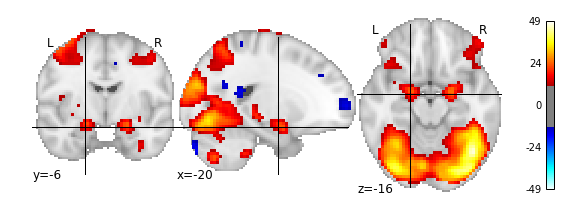

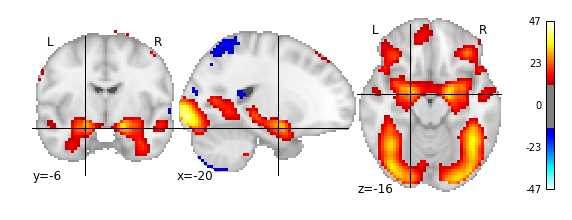

In [33]:
for index, trial in enumerate(trial_names):
    trial_file = os.path.join(path_rmaps, rmaps_file_pattern.format(trial))
    in_vol=nib.load(trial_file)
    
    print("(%s, %s, %s) is the shape of for trial: " %  in_vol.shape, trial)
    print("Min = %.3f; Max = %.3f" % (in_vol.get_data().min(), in_vol.get_data().max()))
    
    
    # Plot volume
    display = plotting.plot_stat_map(in_vol, threshold= 12,
                                     cut_coords=(-20,-6, -16)
                                    )
    display.savefig(os.path.join(path_spm,'group_spm_{}.svg'.format(trial)))
from IPython.display import Image
print ("SPM map from HCP Paper")
Image(url= "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4011498/bin/nihms569034f11.jpg")

SPM map for fear trial


/usr/local/lib/python3.4/dist-packages/matplotlib/artist.py:879: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


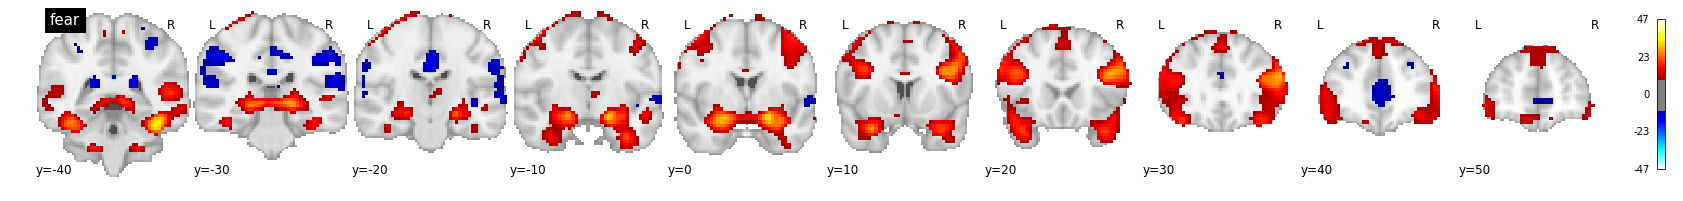

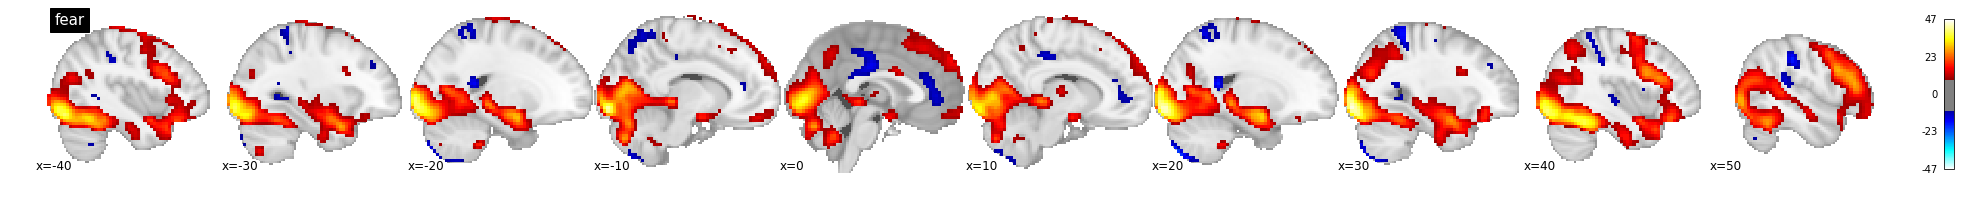

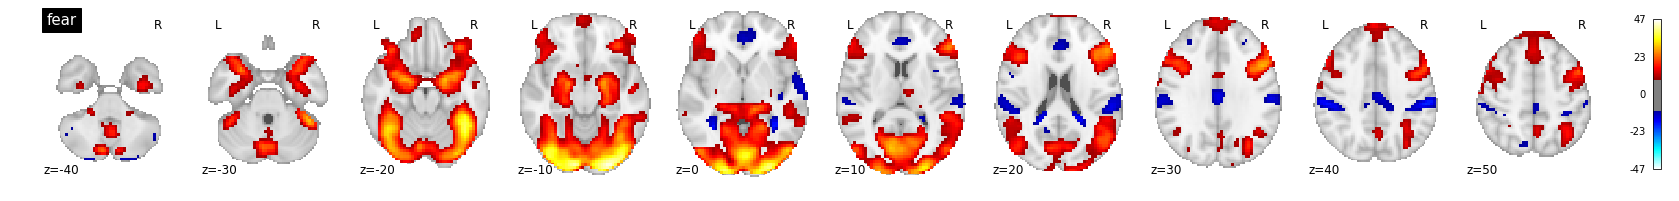

In [27]:
    print ("SPM map for {} trial".format(trial))
    display = plotting.plot_stat_map(in_vol, threshold= 10,
                                     display_mode='y',
                                     cut_coords= range(-40, 60, 10),
                                     title= trial
                                    )
    display = plotting.plot_stat_map(in_vol, threshold=10,
                                     display_mode='x',
                                     cut_coords= range(-40, 60, 10),
                                     title= trial
                                    )
    display = plotting.plot_stat_map(in_vol, threshold=10,
                                     display_mode='z',
                                     cut_coords= range(-40, 60, 10),
                                     title= trial
                                    )
